Learning outcome:

To learn how to add a table of data at the bottom of a graph to give more statistics

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# %load get_df.py
def get_df(yr):
    return pd.read_csv("Environmental_Data_Deep_Moor_{}.csv".format(yr))

In [4]:
# %load get_seasons.py
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [5]:
# %load table_helpers.py
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]


def min_max_temps(yr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
            ) for s in get_seasons(yr)]

In [6]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')] 

Set a different alpha(opacity) corresponding to value of average temperature

In [7]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]

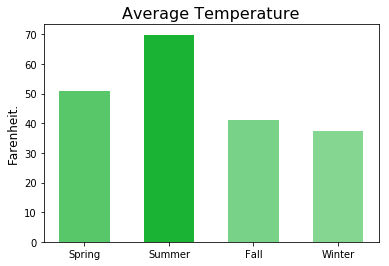

In [8]:
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
plt.show()

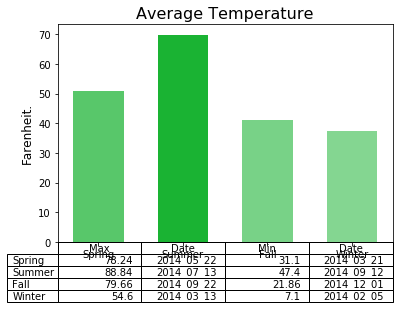

In [9]:
#add a table of the minimum and maximum temperatures and what date they happen for each season to the above bar graph
plt.bar(seasons,heights,.6,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns)
plt.show()

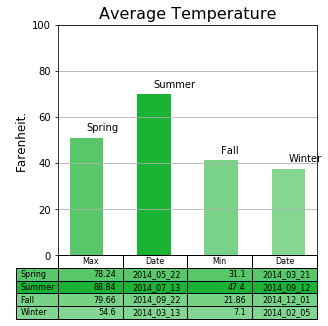

In [11]:
#add a few more modifications that add in some cellColours and rowColours in the format of the same bar graph so that the row of the table corresponds to the season it represents.
plt.bar(seasons,heights, 0.5,align='center',color=colors)
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
rows = ["Spring","Summer","Fall","Winter"]
columns = ["Max","Date","Min","Date"]
plt.table(cellText=min_max_temps('2014'),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors],
         loc='bottom')
plt.xticks([])#remove the xticks from the bar chart by passing an empty array to plt.xticks()
[plt.text(i,h+3,s) for i,h,s in zip([0,1,2,3],heights,seasons)] # add labels directly to the bars instead
plt.ylim(0,100)#set the range of y values to be shown
plt.subplots_adjust(left=0.3, bottom=0.1,top=0.9)
plt.grid(True)
plt.show()